<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_4_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# QUESTIONS:
# 1) Delivery_time -> Predict delivery time using sorting time
# 2) Salary_hike -> Build a prediction model for Salary_hike

# ------------------------------------------------------------

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# `Question-1`

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
time = pd.read_csv('/content/delivery_time.csv')

In [ ]:
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
# PERFORMING EDA ON DATA

# Renaming columns
df = time.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis = 1)

In [ ]:
# Applying descriptive statistic
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
# Checking for DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
# Checking for null values
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [ ]:
# checking for duplicate values
df[df.duplicated()]

,Delivery_Time,Sorting_Time


<Axes: >

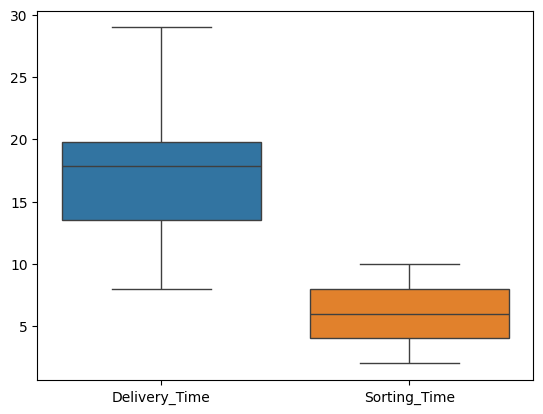

In [ ]:
# PLOTTING THE DATA

# Plotting the data to check for outliers
sns.boxplot(df)

In [ ]:
# There are no outliers in dataset

In [ ]:
# Checking for Correlation between variables

df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

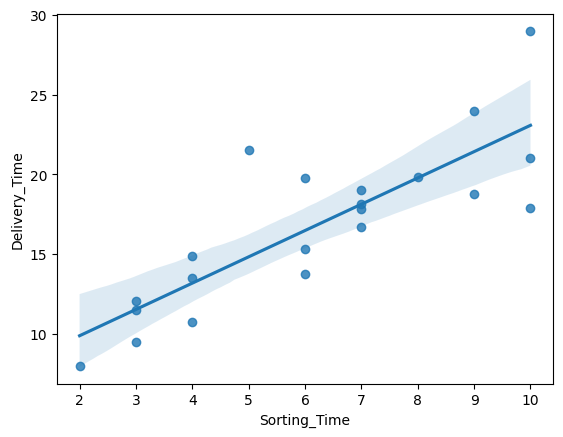

In [ ]:
# Visualization of correlation between x & y

# regplot -> regression plot
sns.regplot(x=df['Sorting_Time'],y=df['Delivery_Time'])

In [ ]:
# As we can see above there is good correlation between two variables
# The score is more than 0.8, which is good.

Text(0.5, 1.0, 'Hetroscedasticity')

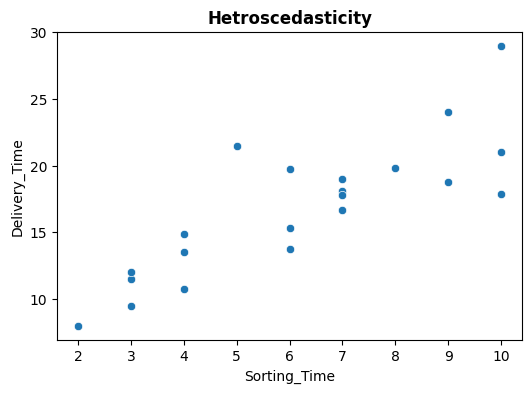

In [ ]:
# Checking for Homoscedasticity or Hetroscedasticity

plt.figure(figsize = (6,4))
sns.scatterplot(x = df['Sorting_Time'], y = df['Delivery_Time'])
plt.title('Hetroscedasticity', fontweight = 'bold')

In [ ]:
df.var()

Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

In [ ]:
# As we can see in above graph Delivery Time increases with increase in  Sorting time
# The data dosn't have specific pattern in variation, but we can't say the variation is homoscedasticity.

In [ ]:
# FEATURE ENGINEERING.

# Trying different transformation of data to estimate normal distribution and to remove any skewness.

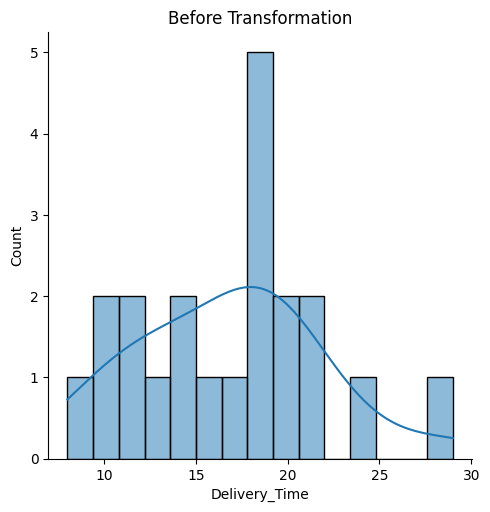

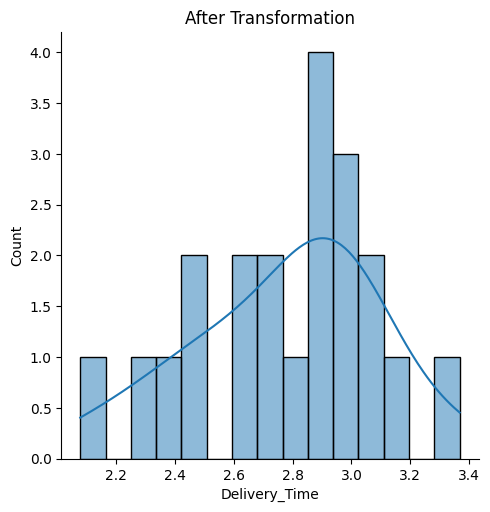

In [ ]:
sns.displot(df['Delivery_Time'], bins = 15, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery_Time']), bins = 15, kde = True)
plt.title('After Transformation')
plt.show()

<ipython-input-126-23ae7d059d4d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery_Time'], bins = 15, kde = True)
<ipython-input-126-23ae7d059d4d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Delivery_Time']), bins = 15, kde = True)


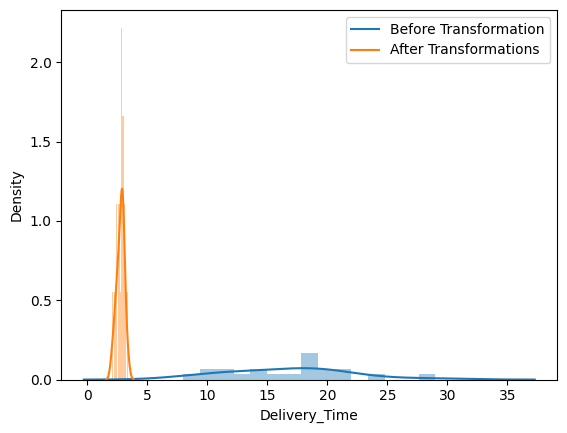

In [ ]:
sns.distplot(df['Delivery_Time'], bins = 15, kde = True)
sns.distplot(np.log(df['Delivery_Time']), bins = 15, kde = True)
labels = ['Before Transformation', 'After Transformations']
plt.legend(labels)
plt.show()

In [ ]:
# As we can see
# - How long transformation affects the data and it scales the values down
# - Before prediction it is necessary to reverse scaled values, even for calculating RMSE for models

Text(0.5, 1.0, 'Cube root Transformation')

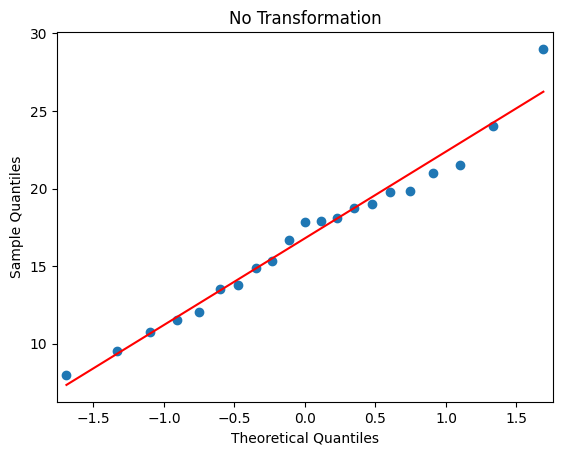

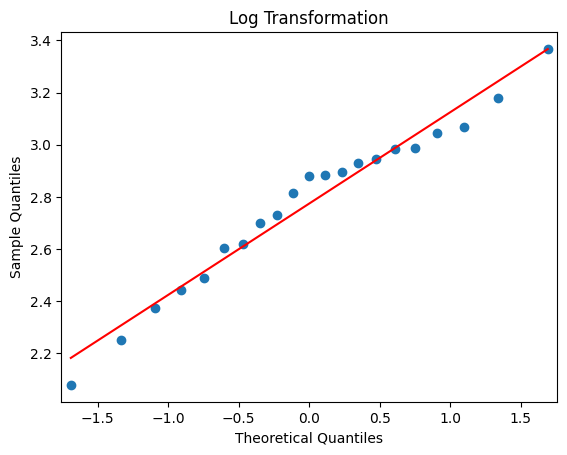

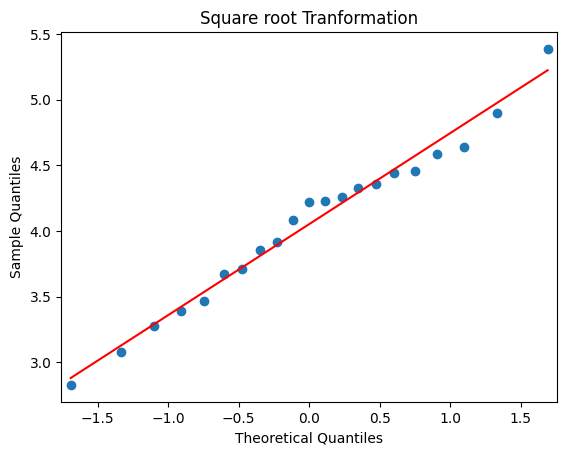

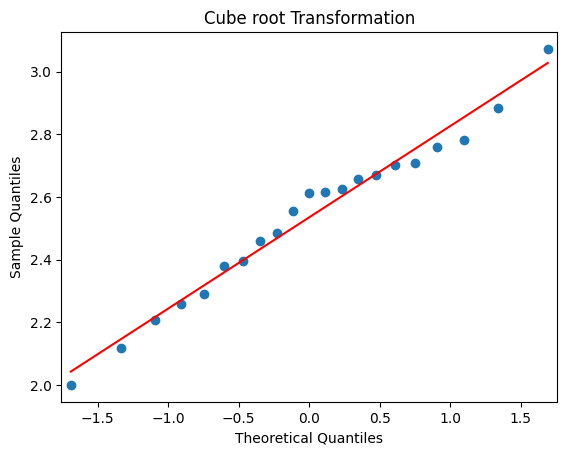

In [ ]:
sm.qqplot(df['Delivery_Time'], line = 'r')
plt.title("No Transformation")
sm.qqplot(np.log(df['Delivery_Time']), line = 'r')
plt.title('Log Transformation')
sm.qqplot(np.sqrt(df['Delivery_Time']), line = 'r')
plt.title('Square root Tranformation')
sm.qqplot(np.cbrt(df['Delivery_Time']), line = 'r')
plt.title("Cube root Transformation")

<ipython-input-129-7bcb7a87d67d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting_Time'], bins = 15, kde=True)
<ipython-input-129-7bcb7a87d67d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Sorting_Time']), bins = 15, kde=True)


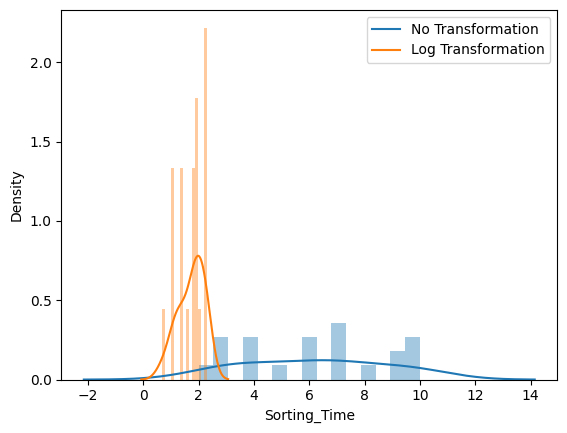

In [ ]:
sns.distplot(df['Sorting_Time'], bins = 15, kde=True)
sns.distplot(np.log(df['Sorting_Time']), bins = 15, kde=True)
labels = ['No Transformation','Log Transformation']
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'cbrt Transformation')

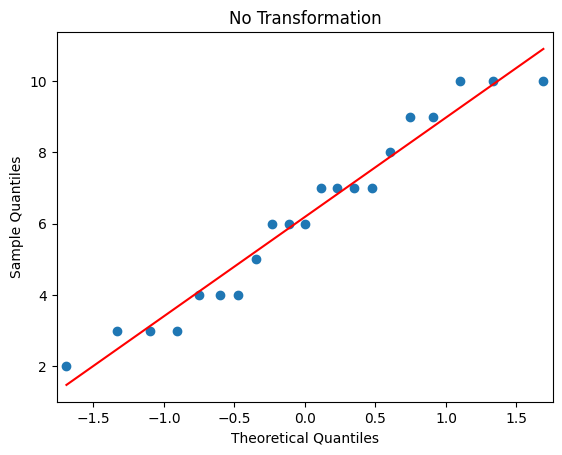

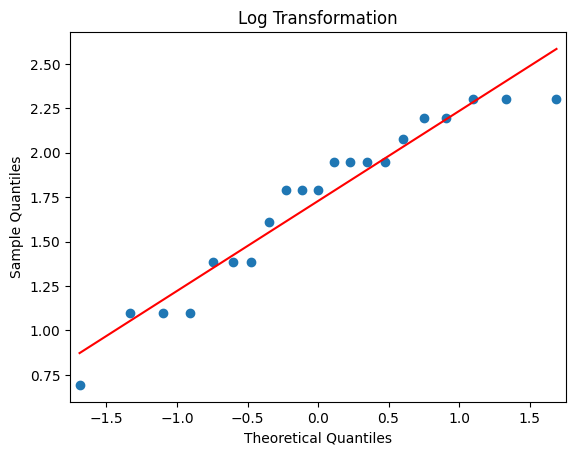

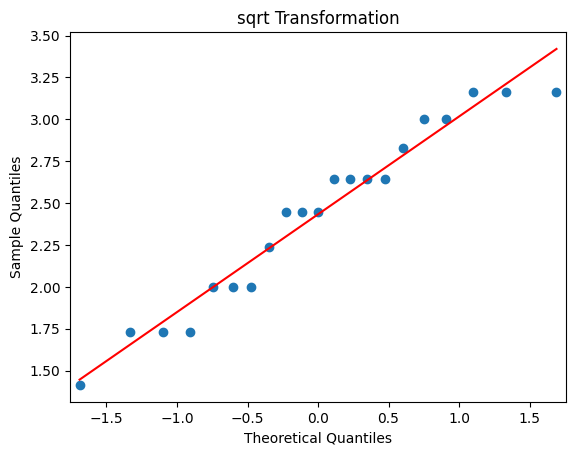

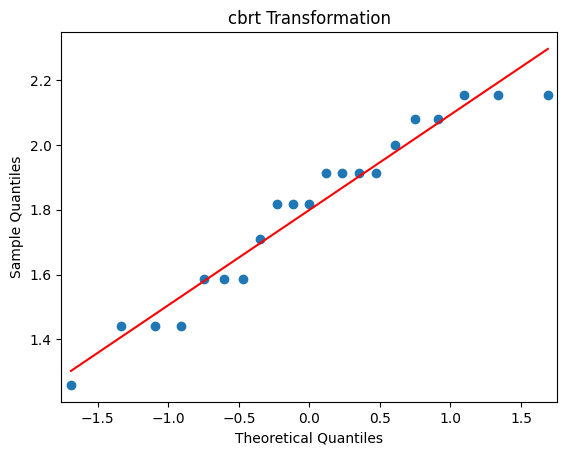

In [ ]:
sm.qqplot(df['Sorting_Time'], line = 'r')
plt.title('No Transformation')
sm.qqplot(np.log(df['Sorting_Time']), line = 'r')
plt.title('Log Transformation')
sm.qqplot(np.sqrt(df['Sorting_Time']), line = 'r')
plt.title('sqrt Transformation')
sm.qqplot(np.cbrt(df['Sorting_Time']), line = 'r')
plt.title('cbrt Transformation')

In [ ]:
# NOTE : We only perform any data transformation when data is skewed or not normal

In [ ]:
# FITTING A LINEAR REGRESSION MODEL

model = smf.ols('Delivery_Time ~ Sorting_Time', data=df).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        11:52:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# As we can see in above model summary
# - The r-squared and adj-rsquared are below 0.8
# - It is a thumb rule to consider adj-r-squared to be greater than 0.8
# - Lets try some data Transformation to check whether these score can get higher

In [ ]:
# Lets Try SQRT- Transformation on model

model1 = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 09 Feb 2024   Prob (F-statistic):           8.48e-07
Time:                            11:52:22   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Here we Notice that
# - The r-squared and adj-r-squared values are still below 0.8
# - So Lets try other data transformation to level up these values

In [ ]:
# Lets Try Cube-Root Transformations on model

model2 = smf.ols('np.cbrt(Delivery_Time) ~ np.cbrt(Sorting_Time)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 09 Feb 2024   Prob (F-statistic):           4.90e-07
Time:                            11:52:22   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Here again we notice that
# - r-squared and adj-r-squared values are below  0.85
# - Lets try another Transformation on data

In [ ]:
# Lets Try LOG-Transformation

model3 = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 09 Feb 2024   Prob (F-statistic):           1.60e-07
Time:                           11:52:22   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Here we get
# - After Log transformation on data, we got 0.772 & 0.76 values of r-square and adj r-square which
#    are highest among the previous models
# - Though it is close to 0.8 which is for single feature/predictor variable is expected to be low, so we can stop here


In [ ]:
# MODEL TESTING

# As Y = Beta0 +Beta1*(X)
# Finding coefficient parameters(Beta0 & Beta1 values)

model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
# Here (Intercept) is Beta0 value = 6.58 & (Sorting_Time) is Beta1 value = 1.64

# - Hypothesis testing of X variable by finding t-value and p-value for Beta1
# - i.e (P_value < 0.05(alpha) ... then reject Null Hypo)
# - Null Hypo = Beta1 = 0(No slope) & Alternate Hypo = Beta1 != 0(Having some slope)

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [ ]:
# (Intercept) Beta0 : tvalue = 3.82, pvalue = 0.001147
# (Sorting_Time) Beta1 : tvalue = 6.38, pvalue = 0.000004
# As p_value < alpha ,....reject Null Hypo
# It implies that X(Sorting_Time)variable has good slope and variance w.r.t Y(Delivery_Time) varaible

# r-squared measures the strenght of relationship between your model and the dependent variable

In [ ]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
# r-squared value is accaptable above 0.65

Text(0.5, 1.0, 'Normal Q-Q plot of residuals of model without any data transformation')

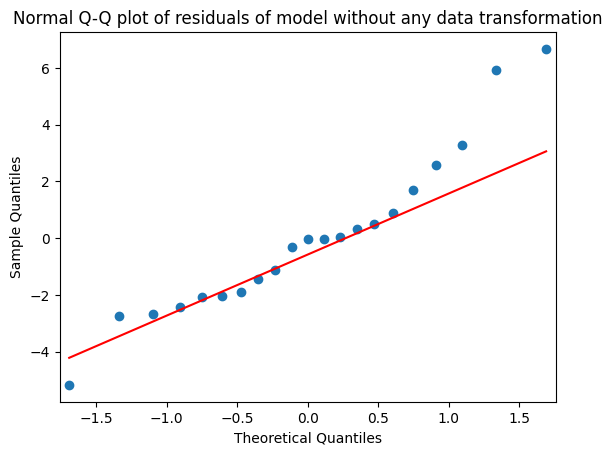

In [ ]:
# RESIDUAL ANALYSIS

# Test for normality of residuals (Q-Q plot)

sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of model without any data transformation')

Text(0.5, 1.0, 'Normal Q-Q plot of residuals of model with data transformation')

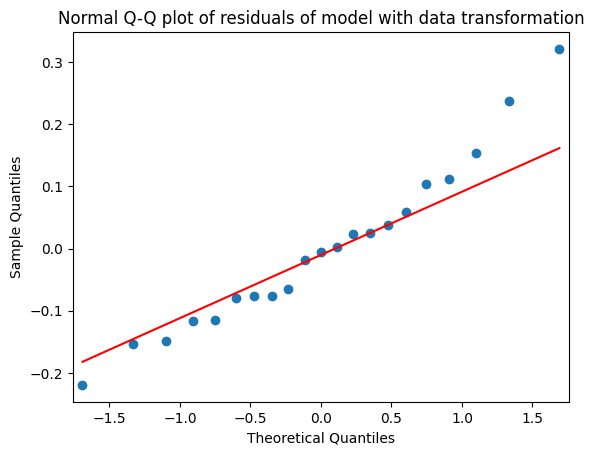

In [ ]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of model with data transformation')

In [ ]:
# As we notice here
# - The first model is right skewed and does not follow normal distribution
# - But second model after transformation follows normal distribution with very less skewness

In [ ]:
# MODEL VALIDATION

# Comparing different models with their root mean squared error values


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model1_pred_y = np.square(model1.predict(df['Sorting_Time']))
model2_pred_y = pow(model2.predict(df['Sorting_Time']),3)
model3_pred_y = np.exp(model3.predict(df['Sorting_Time']))

In [ ]:
model1_rmse = np.sqrt(mean_squared_error(df['Delivery_Time'], model1_pred_y))
model2_rmse = np.sqrt(mean_squared_error(df['Delivery_Time'], model2_pred_y))
model3_rmse = np.sqrt(mean_squared_error(df['Delivery_Time'], model3_pred_y))
print('model:',np.sqrt(model.mse_resid))
print('model1:',model1_rmse)
print('model2:',model2_rmse)
print('model3:',model3_rmse)

model: 2.934903768890139
model1: 2.762294279320867
model2: 2.755584309893576
model3: 2.745828897614548


In [ ]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model2_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model3'

In [ ]:
# From these result we found that model3 has minimum RMSE and highest r-squared values
# So we use model3 for our predictions

In [ ]:
# PREDICTING VALUES USING MODEL3

predicted = pd.DataFrame()
predicted['Sorting_Time'] = time['Sorting Time']
predicted['Delivery_Time'] = time['Delivery Time']
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model3.predict(predicted.Sorting_Time)))
predicted
# We have to use np.exp for predicting values for model3 to normalize results from log transformation

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [ ]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [ ]:
new_data=pd.Series([5,8])
data_pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
np.exp(model.predict(data_pred))

0    2.751986e+06
1    3.873709e+08
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predicted['Delivery_Time'], predicted['Predicted_Delivery_Time'])
print(mse)

7.5395763349751235


# `Question-2`

In [ ]:
salary = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Applying Descriptive statistics
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# Checking for null values

salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# Checking for duplicate records

salary[salary.duplicated()]

,YearsExperience,Salary


In [ ]:
# Checking for variable datatype

salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: >

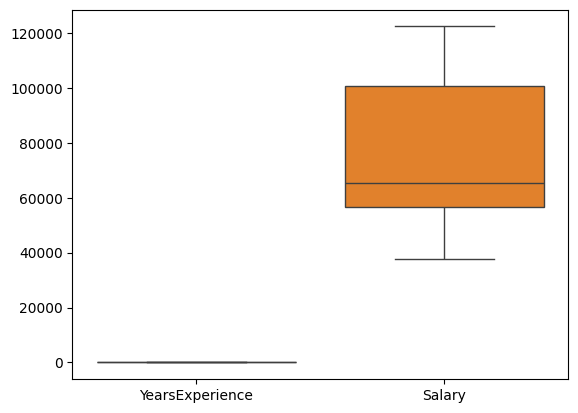

In [ ]:
# Checking for outliers
sns.boxplot(salary)

<ipython-input-170-c8fddc92bb67>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'], bins = 15, kde= True)


Text(0.5, 1.0, 'Experience')

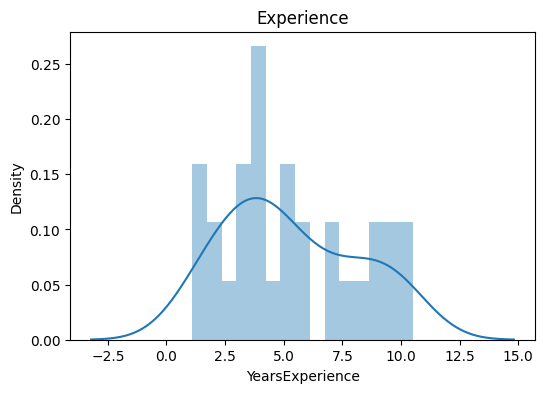

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(salary['YearsExperience'], bins = 15, kde= True)
plt.title('Experience')

<ipython-input-171-286685432b4a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


Text(0.5, 1.0, 'Salary')

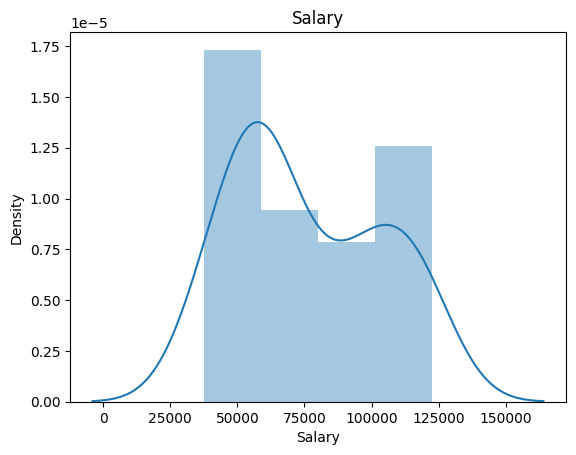

In [ ]:
sns.distplot(salary['Salary'])
plt.title('Salary')

In [ ]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

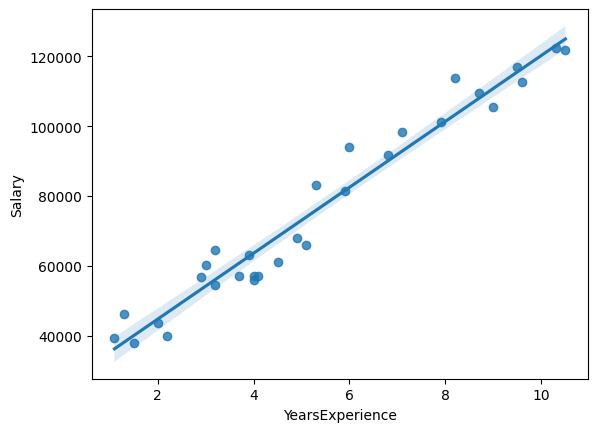

In [ ]:
sns.regplot(x = salary.YearsExperience, y = salary.Salary)

In [ ]:
# MODEL BUILDING

model = smf.ols('Salary~YearsExperience', data = salary).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        12:36:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# MODEL TESTING

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
# Checking pvalues and tvalues

model.pvalues, model.tvalues

(Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64,
 Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64)

In [ ]:
# Checking r-squared and adj r-squared
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
# MODEL PREDICTIONS

new_data = pd.Series([2,3,4,5,1.3, 15])
data_pred = pd.DataFrame(new_data, columns = ['YearsExperience'])
model.predict(data_pred)

0     44692.124842
1     54142.087163
2     63592.049484
3     73042.011806
4     38077.151217
5    167541.635020
dtype: float64